<h1>Credit Card Fraud Transaction Detector</h1>
<p style="font-size:16px">Building a classifier that detects fraudulent transaction made though credit cards.</p>
<p style="font-size:16px">The dataset contains transactions made by credit cards in September 2013 by european cardholders.</p><p style="font-size:16px">It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data could not be provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.</p><hr>

<p style="font-size:15px">Importing the required modules.</p>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import linear_model 
%matplotlib inline 

<p style ="font-size:15px">Loading the dataset in a pandas data frame</p>

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<p style = "font-size:16px">Exploratory Data Analysis</p>

In [4]:
df.shape 

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<p style="font-size:16px">Checking the number of fraudulent transactions</p>


In [6]:
check = df['Class'] == 1
fraud = df[check] 
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


So, out of 284807 transactions, 492 were fake.


<p style="font-size:16px">Visualizing the fraudulent and non-fraudulent transactons.</p> 

In [7]:
non_fraud = df[~check]
non_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Text(0, 0.5, 'Time')

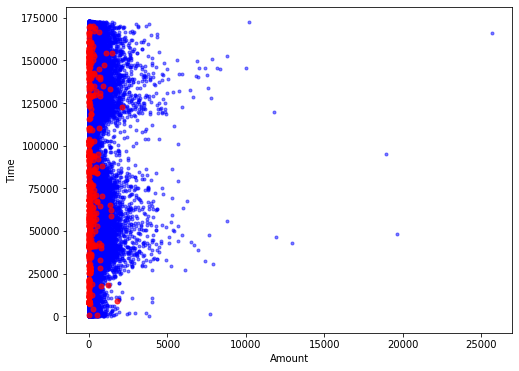

In [8]:
plt.figure(figsize=(8,6))

plt.scatter(non_fraud['Amount'], non_fraud['Time'], color = 'b',marker ='.', alpha = 0.5)
plt.scatter(fraud['Amount'],fraud['Time'],color='r',marker = '.',s =100,alpha = 0.75)
plt.xlabel('Amount')
plt.ylabel('Time')

Text(32.87216145833334, 0.5, 'Time')

<Figure size 720x576 with 0 Axes>

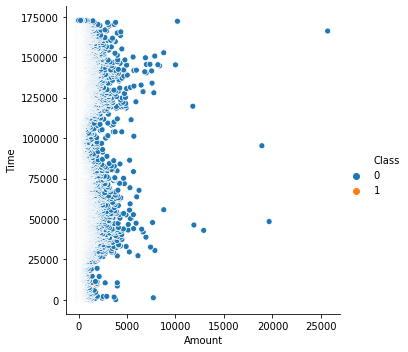

In [9]:
#plotting the same with seaborn 
plt.figure(figsize=(10,8))
sns.relplot(x='Amount',y='Time',data = df, hue='Class')
plt.xlabel("Amount")
plt.ylabel("Time")

<p style="font-size:16px">From the above plots it is evident that the fradulent transactions are of comparatively less amount than non-fraudulent ones.</p>

Selecting the variables to pass in the machine learning model.

In [10]:
X = df.iloc[:,2:29]
y = df[['Class']]

<p style="font-size:15px">Splitting the data for training and testing.</p>

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [12]:
print("Train set: ",X_train.shape,y_train.shape)


Train set:  (213605, 27) (213605, 1)


In [13]:
print("Test set: ",X_test.shape, y_test.shape) 

Test set:  (71202, 27) (71202, 1)


<p style="font-size:18px">Prediciting class labels using Logistic Regression.</p><hr>

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01,solver = 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
yhat = lr.predict(X_test) #To store the predicted values
yhat

array([1, 0, 0, ..., 0, 0, 0])

In [16]:
y_prob = lr.predict_proba(X_test)
y_prob

array([[1.88397245e-04, 9.99811603e-01],
       [9.97664553e-01, 2.33544704e-03],
       [9.97713403e-01, 2.28659701e-03],
       ...,
       [9.97810692e-01, 2.18930830e-03],
       [9.97120187e-01, 2.87981254e-03],
       [9.97443506e-01, 2.55649351e-03]])

<p style="font-size:16px">Testing model accuracy.</p>


In [17]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9991713715906857

<p style = "font-size:16px">The Jaccard score of the model is approximately 0.99 which indicates that the model fits the data perfectly.</p>

In [18]:
# Getting the log loss
from sklearn.metrics import log_loss
log_loss(y_test , y_prob)

0.006146222523305952

<p style="font-size:16px">The log loss value is approcimately 0.006 which is very close to 0. This also indicates that the model fits the data perfectly and the model can be used for predication of class.</p>

Getting the confusion matrix and classification report.

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,yhat,labels=[0,1])

array([[71076,    13],
       [   46,    67]])

[[71076    13]
 [   46    67]]


Text(0.5, -11.150834188162236, 'Predicted label')

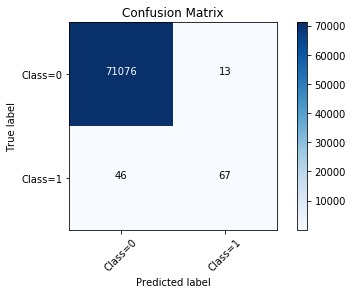

In [20]:
#plotting the confusion matrix 
import itertools
cm = confusion_matrix(y_test, yhat, labels=[0,1])
cmap = plt.cm.Blues
print(cm)

plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ["Class=0","Class=1"], rotation = 45)
plt.yticks(ticks, ['Class=0','Class=1'])
thresh = cm.max() / 2.
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [31]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.84      0.59      0.69       113

    accuracy                           1.00     71202
   macro avg       0.92      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202



<hr>
<p style="font-size:16px">Predicitng class labels using SVM classifier.</p>

In [21]:
from sklearn import svm 
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
# making predictions from the fitted model 
yhat2 = clf.predict(X_test)

In [23]:
yhat2[0:5]

array([1, 0, 0, 0, 0])

<p style = "font-size:16px">Testing the model's accuracy.</p>

In [24]:
from sklearn.metrics import jaccard_similarity_score, f1_score
print("Jaccard score is %f" %jaccard_similarity_score(y_test, yhat2))
print("F1 score is %f" %f1_score(y_test,yhat2))

Jaccard score is 0.999326
F1 score is 0.747368


In [27]:
confusion_matrix(y_test,yhat2)

array([[71083,     6],
       [   42,    71]])

<p style="font-size:16px">Plotting the confusion matrix for data predicted through SVM classifier.</p>

[[71083     6]
 [   42    71]]


Text(0.5, -11.150834188162236, 'Predicted label')

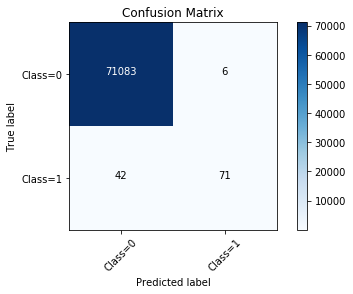

In [29]:
cm = confusion_matrix(y_test, yhat2, labels = [0,1])
cmap = plt.cm.Blues
print(cm)

plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ["Class=0","Class=1"], rotation = 45)
plt.yticks(ticks, ['Class=0','Class=1'])
thresh = cm.max() / 2.
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h3>This concludes that both SVM and logistic regression fit the data well. SVM reduces the type 1 error as the number of false positives is less but the difference is not very high. Both have the same type 2 error. Both the algorithms fit the data well with high jaacard similarity score and can be used for predicting the type of transaction.</h3>